Utilizando K-Means para segmentar as imagens.

* Importa a imagem.
* Aumenta o contrate.
* Transforma em array
* Trata o array como se fosse um scatterplot
* Roda K-means com 2 centroides
* Como base na clusterização, obtém se a *decision boundary*.
* Aplica a *decision boundary* na array da imagem e exclui uma das mãos.

É a primeira versão. O código precisa ser limpo e aprimorado. Ainda há a necessidade de identificar as imagens com 1 ou duas mãos.

In [73]:
import numpy as np
import pandas as pd
from PIL import Image, ImageEnhance, ImageOps
import matplotlib.pyplot as plt
import random
from scipy import stats
import os
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression

In [74]:
image_path = '../input/i2a2-bone-age-regression/images/'

In [75]:
test_df = pd.read_csv('../input/i2a2-bone-age-regression/test.csv')

In [76]:
image_name = test_df['fileName'][random.randint(0,test_df.shape[0])]
print(image_name)

E1801C11-35E7-480B-9647-0DD9B73AE6BC.png


PNG (1024, 1024) L


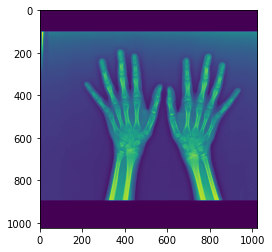

In [77]:
im = Image.open(os.path.join(image_path,image_name))
print(im.format, im.size, im.mode)
plt.imshow(im)

In [78]:
im_arr = np.asarray(im)
statsval = stats.describe(np.ndarray.flatten(im_arr[0:10]))
print(statsval)

DescribeResult(nobs=10240, minmax=(0, 0), mean=0.0, variance=0.0, skewness=0.0, kurtosis=-3.0)


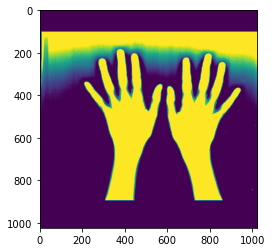

In [79]:
im_enh = ImageEnhance.Contrast(im)
im_enh = im_enh.enhance(10)
plt.imshow(im_enh)

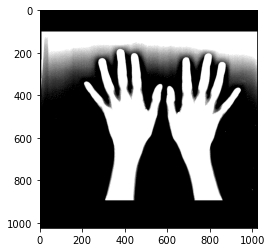

In [80]:
im_enh_bw = im_enh.convert('1')
plt.imshow(im_enh_bw)

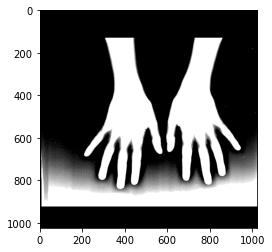

In [81]:
im_enh_bw_flip = ImageOps.flip(im_enh_bw)
plt.imshow(im_enh_bw_flip)

In [82]:
im_arr = np.asarray(im_enh_bw_flip, dtype=int)
print(im_arr)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [83]:
im_arr.shape

(1024, 1024)

In [84]:
im_cont_x = []
im_cont_y = []
for i in (range(0, im_arr.shape[0])):
    for j in (range(0, im_arr.shape[1])):
        if im_arr[i][j] > 0:
            #line = 0
            im_cont_y.append(i)
            im_cont_x.append(j)

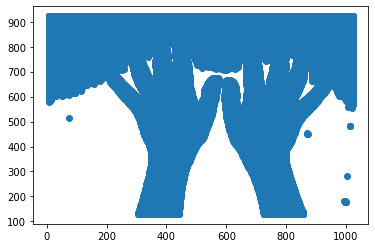

In [85]:
plt.scatter(im_cont_x,im_cont_y)

In [86]:
im_cont_x_arr = np.asarray(im_cont_x)
im_cont_y_arr = np.asarray(im_cont_y)
im_cont_arr = np.stack((im_cont_x_arr, im_cont_y_arr),axis=1)
print(im_cont_arr.shape)

(351378, 2)


In [87]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(im_cont_arr)
labels = kmeans.labels_

print(labels.shape)

(351378,)


In [88]:
print(labels)

[1 1 1 ... 0 0 0]


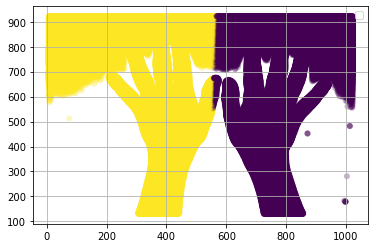

In [89]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
 
ax.scatter(im_cont_x_arr, im_cont_y_arr,  c=labels, alpha=0.3, edgecolors='none')
ax.legend()
ax.grid(True)

plt.show()

In [90]:
clf = LogisticRegression(random_state=0).fit(im_cont_arr, labels)
clf.predict(im_cont_arr)

print(clf.coef_)
print(clf.intercept_)

[[-7.39425641  0.23844668]]
[3967.09199591]


In [91]:
grafico_a = []
grafico_b = []
for a in range(0,im_arr.shape[1]):
    b = (-clf.intercept_-clf.coef_[0][0]*a)/clf.coef_[0][1]
    if (b >= 0) and (b <= im_arr.shape[0]): 
        grafico_a.append(a)
        grafico_b.append(int(b))

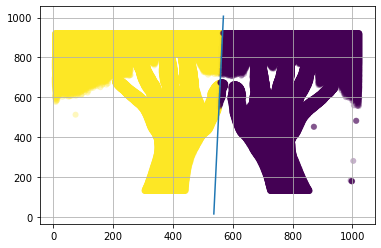

In [92]:
plot, ax = plt.subplots()

    
ax.scatter(im_cont_x_arr, im_cont_y_arr,  c=labels, alpha=0.3, edgecolors='none')


ax.grid(True)


ax.plot(grafico_a,grafico_b)

plt.show()

(1024, 1024)


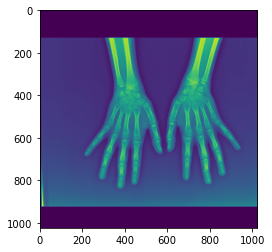

In [93]:
plot, ax = plt.subplots()
plt.imshow(ImageOps.flip(im))
im_arr_crop = np.asarray(im_enh, dtype=int)
print(im_arr_crop.shape)

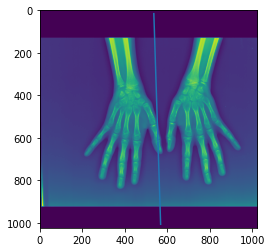

In [94]:
plot, ax = plt.subplots()
plt.imshow(ImageOps.flip(im))
grafico_a = []

grafico_b = []
for a in range(0,im_arr.shape[1]):
    b = (-clf.intercept_-clf.coef_[0][0]*a)/clf.coef_[0][1]
    if (b >= 0) and (b <= im_arr.shape[0]): 
        grafico_a.append(a)
        grafico_b.append(int(b))

ax.plot(grafico_a,grafico_b)
plt.show()

In [95]:
grafico_a_arr = np.asarray(grafico_a)
grafico_b_arr = np.asarray(grafico_b)
grafico_arr = np.stack((grafico_a_arr, grafico_b_arr),axis=1)

In [107]:
im_final_1 = np.asarray(ImageOps.flip(im)).copy()
c=0
for i in range(0,grafico_arr.shape[0]):
    
    a = grafico_arr[i][0]
    b = grafico_arr[i][1]  
    
    for j in range(c,b):
        for n in range(0,a):
            im_temp = im_final_1
            im_temp[j][n] = random.randint(statsval[1][0],statsval[1][1])
    c = b

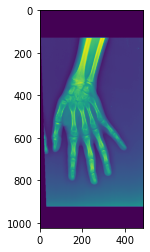

In [108]:
im_crop = Image.fromarray(im_temp)
im_crop = im_crop.crop((grafico_a_arr.min(),0,im_arr.shape[0],im_arr.shape[1]))
plt.imshow(im_crop)

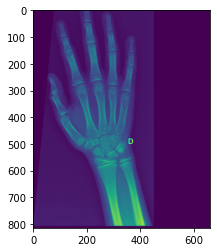

In [109]:
im_crop_unflip = ImageOps.flip(im_crop)
plt.imshow(bbbbbbb)
